## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

done

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [6]:
import random
from sklearn.datasets import load_boston
data = load_boston()
x,y = data['data'][:, 0], data['target'] # x:per capita crime rate by town,  y:Median value of owner-occupied homes in $1000's

In [2]:
def y_hat(k, b):
    return k*x+b
def loss_func(y, y_hat):
    return 1/len(y)*sum( abs(y_i-y_hat_i) for y_i,y_hat_i in zip(y,y_hat) )
def partial_k(k, b):
    return 1/len(y)*sum( -x_i*(y_i-y_hat_i) if y_i>y_hat_i else x_i*(y_i-y_hat_i)  for x_i,y_i,y_hat_i in zip(x,y,y_hat(k,b)) )
def partial_b(k, b):
    return 1/len(y)*sum( -1*(y_i-y_hat_i) if y_i>y_hat_i else y_i-y_hat_i  for y_i,y_hat_i in zip(y,y_hat(k,b)) )
#相较循环， 列表解析显著提高了运行速度

In [9]:
learning_rate = 0.01
min_loss=float('inf')
best_k = random.random()*200 - 100
best_b = random.random()*200 - 100
for i in range(1000):
    k = best_k + -learning_rate*partial_k(best_k, best_b) 
    b = best_b + -learning_rate*partial_b(best_k, best_b)
    loss = loss_func(y, y_hat(k, b))
    if loss<min_loss:
        min_loss=loss
        best_k = k
        best_b = b
    if i%100==0: print(i,best_k, best_b, min_loss)

0 -8.996402583899354 -33.51747558568965 88.38120006031704
100 3.0774286295076716 -31.59850489653726 48.8985327679939
200 3.0774286295076716 -31.59850489653726 48.8985327679939
300 3.0774286295076716 -31.59850489653726 48.8985327679939
400 3.0774286295076716 -31.59850489653726 48.8985327679939
500 3.0774286295076716 -31.59850489653726 48.8985327679939
600 3.0774286295076716 -31.59850489653726 48.8985327679939
700 3.0774286295076716 -31.59850489653726 48.8985327679939
800 3.0774286295076716 -31.59850489653726 48.8985327679939
900 3.0774286295076716 -31.59850489653726 48.8985327679939


### Part 3: Finish the Solution Parse Part of Edit-Distance

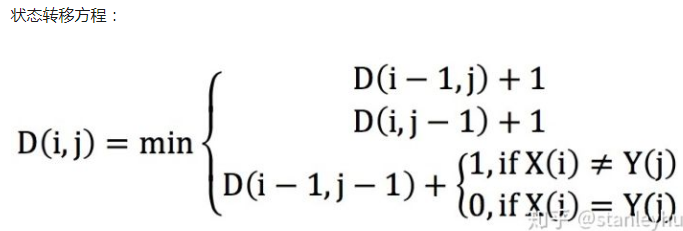

In [7]:
from functools import lru_cache
solution = {}
candidates = []
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, '- {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, '+ {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)

    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation #是的，它只记住最优，但是别的路线上的子问题的最优他也记录下来了！
    
    return min_distance

In [8]:
parse={}
i=0
def parse_solution(str1, str2):
    global i                  #全局变量(在python的函数中和全局同名的变量，如果你有修改变量的值就会变成局部变量)
    if str1==str2: return parse
    i = i + 1
    last_option = solution[(str1, str2)]
    if last_option != '':
        parse['倒数第{}位'.format(i)]=last_option
        
    if "-" in last_option:
        parse_solution(str1[:-1], str2)
    elif "+" in last_option:
        parse_solution(str1, str2[:-1])
    else:
        parse_solution(str1[:-1],str2[:-1])

In [9]:
print(edit_distance('ABCDE', 'ABCCEF'))
parse_solution('ABCDE', 'ABCCEF')
parse

2


{'倒数第1位': '+ F', '倒数第3位': 'SUB D => C'}

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: **NIPS_ ICML_ ICLR_ ACL_ AAAI**

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans: Because we want to minimize the loss function.

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans: The gradient is the partial derivative, and the descent means we change the virables in the opposite direction of gradient.


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans: It has the fastest speed to get the minimal loss function.

4. Using the simple words to describe: What's the machine leanring.¶

Ans: **Machine learning** is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. 

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Dynamic programming is used where we have problems, which can be divided into similar sub-problems, so that their results can be re-used. We use dynamic programming to simplify a complicated problem. Dynamic programming is a method implemented in the search problem.

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

It's the process of solving easier-to-solve sub-problems and building up the answer from that. For the problems that we can break into sub-problems, using dynamic programming is faster and more precise than machine learning.

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Fibonacci sequence, Tower of Hanoi puzzle, Matrix chain multiplication.

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Automatic Speech Recognition, Spelling Correction, Computational Biology.

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

* Optimal Substructure: If an optimal solution contains optimal sub solutions then a problem exhibits optimal substructure.
* Overlapping subproblems: When a recursive algorithm would visit the same subproblems repeatedly, then a problem has overlapping subproblems.
* Recursive algorithm: Optimal solutions to a subproblem is extended from previous optimal solutions

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

* No general formation of Dynamic Program is available; every problem has to be solving in its own way.
* Dividing problem in sub problem and storing inter mediate results consumes memory.

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:
搜索 & dynamic programming
<br>实际问题：送外卖（一个点，多个点）

In [10]:
import random
import matplotlib.pylab as plt

In [18]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

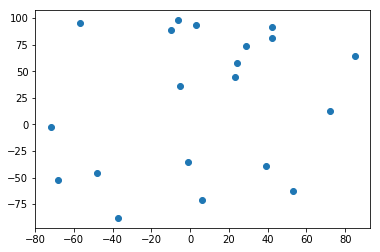

In [19]:
plt.scatter(latitudes, longitude)

【简单版】--Q: 给定初始点P和其他点，一辆车遍历所有点最短路程及路径？

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [20]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [21]:
import matplotlib.pyplot as plt

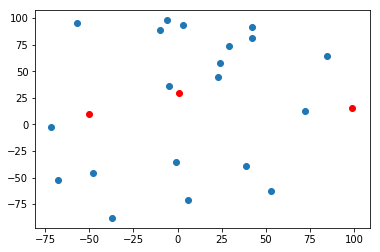

In [22]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro